In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | thompson
Processing Record 3 of Set 13 | twentynine palms
Processing Record 4 of Set 13 | san luis
Processing Record 5 of Set 13 | staveley
Processing Record 6 of Set 13 | port lincoln
Processing Record 7 of Set 13 | new norfolk
Processing Record 8 of Set 13 | korla
Processing Record 9 of Set 13 | axim
Processing Record 10 of Set 13 | lagoa
Processing Record 11 of Set 13 | xingyi
Processing Record 12 of Set 13 | yueyang
Processing Record 13 of Set 13 | hithadhoo
Processing Record 14 of Set 13 | lompoc
Processing Record 15 of Set 13 | barrow
Processing Record 16 of Set 13 | sorland
Processing Record 17 of Set 13 | xacmaz
Processing Record 18 of Set 13 | okhotsk
Processing Record 19 of Set 13 | svetlyy
Processing Record 20 of Set 13 | klaksvik
Processing Record 21 of Set 13 | vao
Processing Record 22 of Set 13 | ushuaia
Processing Record 23 of Set 13 | tomatlan
Processing Record 24 of Se

Processing Record 40 of Set 16 | masunga
Processing Record 41 of Set 16 | hakkari
Processing Record 42 of Set 16 | kamina
Processing Record 43 of Set 16 | isangel
Processing Record 44 of Set 16 | liverpool
Processing Record 45 of Set 16 | guane
Processing Record 46 of Set 16 | linhares
Processing Record 47 of Set 16 | vestmannaeyjar
Processing Record 48 of Set 16 | sidi ali
Processing Record 49 of Set 16 | pierre
Processing Record 50 of Set 16 | kruisfontein
Processing Record 1 of Set 17 | ponta delgada
Processing Record 2 of Set 17 | gat
Processing Record 3 of Set 17 | constitucion
Processing Record 4 of Set 17 | warqla
City not found. Skipping...
Processing Record 5 of Set 17 | berezovyy
Processing Record 6 of Set 17 | fuling
Processing Record 7 of Set 17 | upernavik
Processing Record 8 of Set 17 | haimen
Processing Record 9 of Set 17 | ardakan
Processing Record 10 of Set 17 | bolshaya atnya
City not found. Skipping...
Processing Record 11 of Set 17 | omsukchan
Processing Record 12 o

Processing Record 28 of Set 20 | richards bay
Processing Record 29 of Set 20 | chara
Processing Record 30 of Set 20 | pontes e lacerda
Processing Record 31 of Set 20 | novobirilyussy
Processing Record 32 of Set 20 | ocos
Processing Record 33 of Set 20 | taihe
Processing Record 34 of Set 20 | broken hill
Processing Record 35 of Set 20 | samana
Processing Record 36 of Set 20 | kavaratti
Processing Record 37 of Set 20 | parrita
Processing Record 38 of Set 20 | naraina
Processing Record 39 of Set 20 | bengkulu
Processing Record 40 of Set 20 | inirida
Processing Record 41 of Set 20 | xiaoyi
Processing Record 42 of Set 20 | arraial do cabo
Processing Record 43 of Set 20 | moron
Processing Record 44 of Set 20 | port-cartier
Processing Record 45 of Set 20 | umm durman
City not found. Skipping...
Processing Record 46 of Set 20 | ghansor
Processing Record 47 of Set 20 | daura
Processing Record 48 of Set 20 | khani
Processing Record 49 of Set 20 | chokurdakh
Processing Record 50 of Set 20 | nyaun

Processing Record 13 of Set 24 | hortobagy
Processing Record 14 of Set 24 | vila velha
Processing Record 15 of Set 24 | asau
Processing Record 16 of Set 24 | dawei
Processing Record 17 of Set 24 | tilichiki
Processing Record 18 of Set 24 | linxia
Processing Record 19 of Set 24 | aldama
Processing Record 20 of Set 24 | katakwi
Processing Record 21 of Set 24 | tabuk
Processing Record 22 of Set 24 | huambo
Processing Record 23 of Set 24 | teya
Processing Record 24 of Set 24 | coihaique
Processing Record 25 of Set 24 | saint-pierre
Processing Record 26 of Set 24 | arkhara
Processing Record 27 of Set 24 | tiarei
Processing Record 28 of Set 24 | macaboboni
City not found. Skipping...
Processing Record 29 of Set 24 | vila
Processing Record 30 of Set 24 | olinda
Processing Record 31 of Set 24 | katiola
Processing Record 32 of Set 24 | jalu
Processing Record 33 of Set 24 | ucluelet
Processing Record 34 of Set 24 | puerto del rosario
Processing Record 35 of Set 24 | payson
Processing Record 36 o

In [12]:
length_cities=len(city_data)
length_cities

577

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,28.56,59,75,4.61,CA,2021-10-21 00:40:25
1,Twentynine Palms,34.1356,-116.0542,76.86,19,6,1.99,US,2021-10-21 00:40:26
2,San Luis,-33.2950,-66.3356,68.74,30,0,8.52,AR,2021-10-21 00:39:57
3,Staveley,53.2667,-1.3500,48.63,86,100,14.20,GB,2021-10-21 00:40:27
4,Port Lincoln,-34.7333,135.8667,66.51,57,5,11.70,AU,2021-10-21 00:36:12
5,New Norfolk,-42.7826,147.0587,68.72,46,100,4.00,AU,2021-10-21 00:40:27
6,Korla,41.7597,86.1469,51.12,28,0,2.04,CN,2021-10-21 00:39:13
7,Axim,4.8699,-2.2405,77.74,87,100,9.10,GH,2021-10-21 00:40:28
8,Lagoa,39.0500,-27.9833,68.50,62,1,1.07,PT,2021-10-21 00:40:29
9,Xingyi,24.1877,102.8170,59.14,97,100,3.44,CN,2021-10-21 00:40:29


In [14]:
new_column_order= ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [15]:
city_data_df=city_data_df[new_column_order]

In [16]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-10-21 00:40:25,55.7435,-97.8558,28.56,59,75,4.61
1,Twentynine Palms,US,2021-10-21 00:40:26,34.1356,-116.0542,76.86,19,6,1.99
2,San Luis,AR,2021-10-21 00:39:57,-33.2950,-66.3356,68.74,30,0,8.52
3,Staveley,GB,2021-10-21 00:40:27,53.2667,-1.3500,48.63,86,100,14.20
4,Port Lincoln,AU,2021-10-21 00:36:12,-34.7333,135.8667,66.51,57,5,11.70


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#Extract relevant fields from the DataFrame for plotting 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

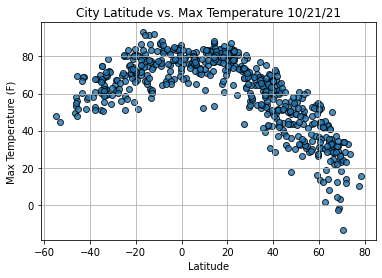

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

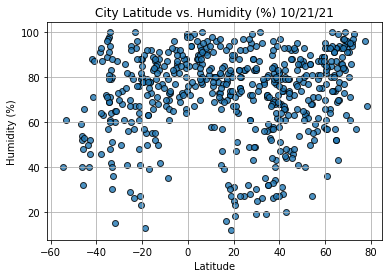

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

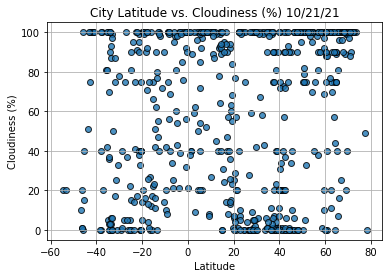

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

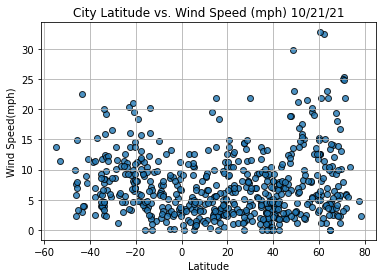

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2021-10-21 00:40:07
Lat                       71.2906
Lng                     -156.7887
Max Temp                    28.42
Humidity                       86
Cloudiness                     90
Wind Speed                  21.85
Name: 13, dtype: object

In [28]:
 city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-10-21 00:40:25,55.7435,-97.8558,28.56,59,75,4.61
1,Twentynine Palms,US,2021-10-21 00:40:26,34.1356,-116.0542,76.86,19,6,1.99
3,Staveley,GB,2021-10-21 00:40:27,53.2667,-1.3500,48.63,86,100,14.20
6,Korla,CN,2021-10-21 00:39:13,41.7597,86.1469,51.12,28,0,2.04
7,Axim,GH,2021-10-21 00:40:28,4.8699,-2.2405,77.74,87,100,9.10


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


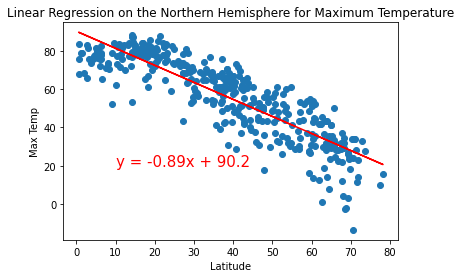

In [33]:
# Linear regression on temp in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))


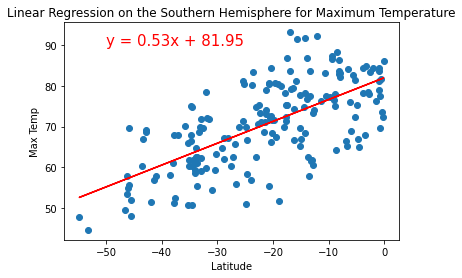

In [36]:
# Linear regression on temp in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

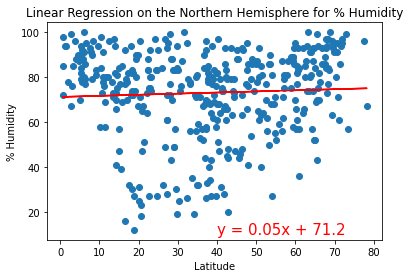

In [37]:
# Linear regression on humidity in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))


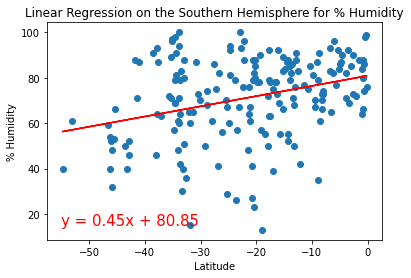

In [39]:
# Linear regression on humidity in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,15))


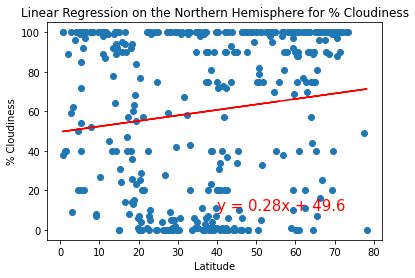

In [40]:
# Linear regression on cloudinesss in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))


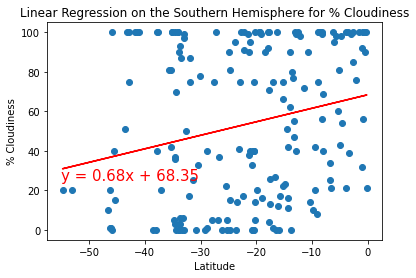

In [42]:
# Linear regression on cloudiness in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,25))


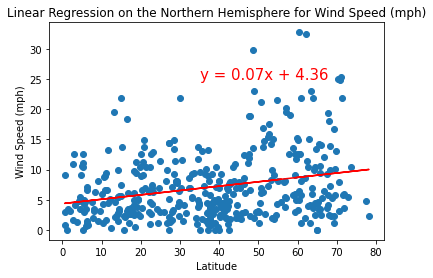

In [45]:
# Linear regression on wind speed in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed (mph)', 'Wind Speed (mph)',(35,25))


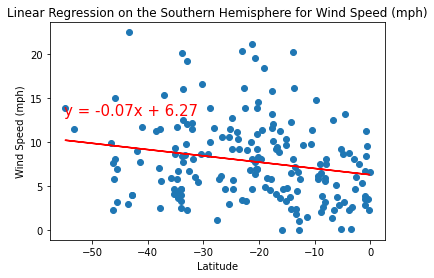

In [52]:
# Linear regression on wind speed in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed (mph)', 'Wind Speed (mph)',(-55,13))
